In [5]:
#imports
import torch

from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

import torchvision.models as models
import torch.nn as nn

from sklearn.metrics import accuracy_score

In [6]:
#definim transformarea imaginilor
img_size = 224

transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),  # Resize images
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize (ResNet standard)
])

In [7]:
#definim directoarele:
#train_dir = "D:\Facultate\Licenta\DatasetTrim"
valid_dir = "D:\Facultate\Licenta\DatasetTrim\Validation"
test_dir = "D:\Facultate\Licenta\DatasetTrim\Test"

In [ ]:
#train_dataset = ImageFolder(root=train_dir, transform=transform)
valid_dataset = ImageFolder(root=valid_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

In [9]:
#Creating DataLoaders - efficiently load batches of images during training.
batch_size = 32

#train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


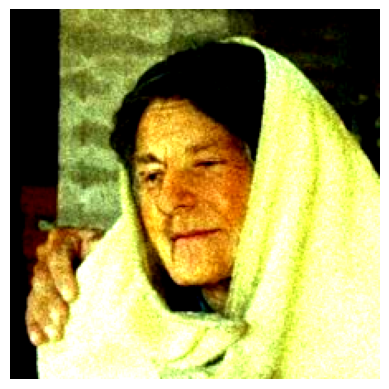

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of training data
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Convert images to numpy format for visualization
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
    img = img * 0.5 + 0.5  # Unnormalize
    plt.imshow(img)
    plt.axis('off')

# Show the first image in the batch
imshow(images[0])
plt.show()

In [11]:
#Load Pretrained ResNet Model
model = models.resnet50(pretrained=True)

# Modify the classifier for binary classification
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)

#Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

c:\Users\ALex\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ALex\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images).squeeze()
        preds = torch.sigmoid(outputs) > 0.5
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        
accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 51.17%
